# 🧠 OpenCV Image Blur and Restoration Project
This Jupyter notebook demonstrates how to:
1. Load a good (sharp) image.
2. Convert it into a blurred image.
3. Attempt to restore (deblur) it using basic OpenCV techniques.

## Libraries used
- `cv2` (OpenCV)
- `numpy`
- `matplotlib`


In [1]:
# Step 1: Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image(title, img):
    plt.figure(figsize=(6,6))
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

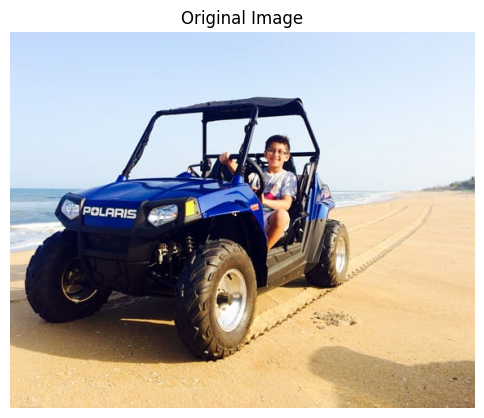

In [2]:
# Step 2: Load the original image
image_path = '/content/kids-ride.jpg'  # Change this path to your own image
original = cv2.imread(image_path)
if original is None:
    raise ValueError('Image not found. Please check the file path.')
show_image('Original Image', original)

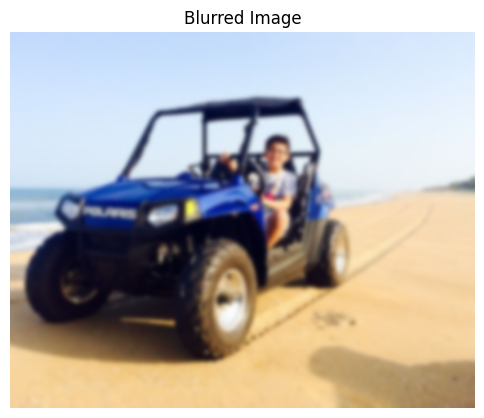

In [3]:
# Step 3: Blur the image using Gaussian Blur
blurred = cv2.GaussianBlur(original, (15, 15), 0)
show_image('Blurred Image', blurred)

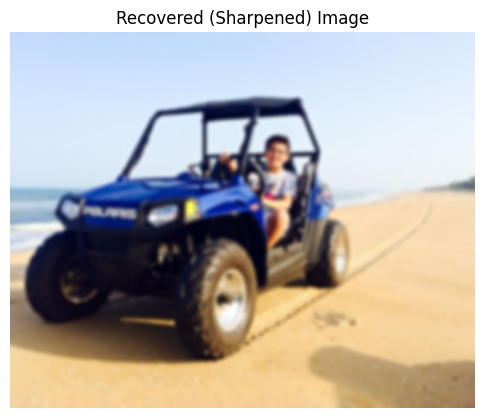

In [4]:
# Step 4: Sharpen (Recover) the blurred image using Unsharp Masking
def sharpen_image(img):
    gaussian = cv2.GaussianBlur(img, (9, 9), 10.0)
    sharpened = cv2.addWeighted(img, 1.5, gaussian, -0.5, 0)
    return sharpened

sharpened = sharpen_image(blurred)
show_image('Recovered (Sharpened) Image', sharpened)

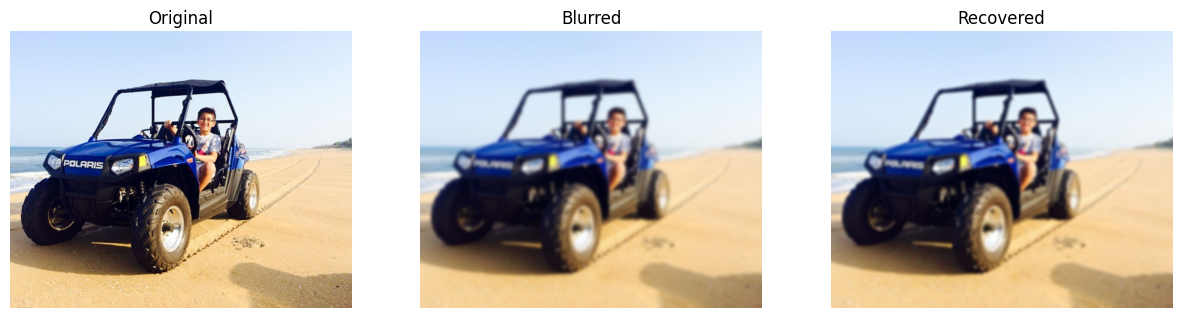

In [5]:
# Step 5: Compare all images side by side
plt.figure(figsize=(15,5))
titles = ['Original', 'Blurred', 'Recovered']
images = [original, blurred, sharpened]

for i in range(3):
    plt.subplot(1,3,i+1)
    img = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(titles[i])
    plt.axis('off')
plt.show()

## ⚙️ Optional Step: Advanced Deblurring (Fourier-based restoration)
This section applies a simple inverse filtering approach using FFT to estimate the original sharp image.

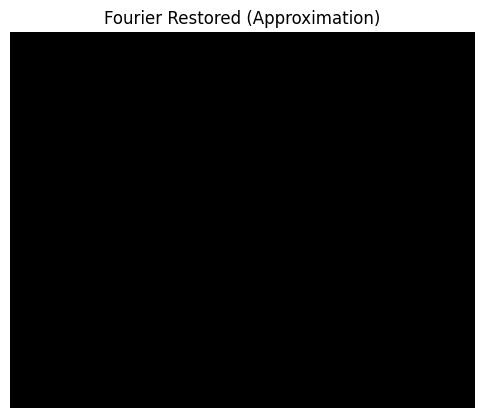

In [6]:
gray_blurred = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
f = np.fft.fft2(gray_blurred)
fshift = np.fft.fftshift(f)
magnitude = np.abs(fshift)
threshold = np.max(magnitude) * 0.01
fshift[magnitude < threshold] = threshold
inverse_filter = 1 / fshift
restored = np.fft.ifft2(np.fft.ifftshift(fshift * inverse_filter))
restored = np.abs(restored)
show_image('Fourier Restored (Approximation)', restored)